In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

In [8]:
Xtr, Ytr = mnist.train.next_batch(60000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(10000)

In [9]:
import tensorflow as tf
import numpy as np
from sklearn import metrics


In [10]:
xtr = tf.placeholder("float", [None, 784],name='TrainMatrix')
xte = tf.placeholder("float", [784],name='TestVector')

In [11]:
#L1 function
distanceL1 = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)


#L2 function
distanceL2 = tf.reduce_sum(tf.square(tf.add(xtr, tf.negative(xte))), reduction_indices=1)


<b>Change distanceL1 to distanceL2 accordingly</b>

In [13]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    preds=[]
    sess.run(init)
    for i in xrange(len(Yte)):
        distAll = sess.run(distanceL1, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        prediction=Ytr[distAll.argmin()]
        preds.append(prediction)

In [34]:
def getAccu(preds,Yte):
    correct_preds=0
    for i in range(len(preds)):
        if(preds[i].nonzero()[0][0]==Yte[i].nonzero()[0][0]):
            #print(1)
            correct_preds+=1
    return((correct_preds*1.0)/len(preds)*100)

In [35]:
getAccu(preds,Yte)

96.77

<b>Confusion Matrix and Report for L2 distance</b>

In [8]:
print("Accuracy achieved with L1 distance is 96.54%")

Accuracy achieved with L1 distance is 96.54%


In [6]:
print("Accuracy achieved with L2 distance is 96.77%")

Accuracy achieved with L2 distance is 96.77%


In [47]:
predictioins_index=[i.nonzero()[0][0] for i in preds]
true_index=[i.nonzero()[0][0] for i in Yte]
metrics.confusion_matrix(true_index,predictioins_index,[i for i in range(0,10)])

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1129,    3,    0,    1,    1,    1,    0,    0,    0],
       [   8,    6,  990,    5,    1,    0,    3,   16,    3,    0],
       [   0,    1,    2,  969,    1,   19,    0,    7,    8,    3],
       [   0,    7,    0,    0,  940,    0,    4,    5,    1,   25],
       [   1,    1,    0,   12,    2,  860,    5,    1,    5,    5],
       [   4,    3,    0,    0,    3,    5,  943,    0,    0,    0],
       [   0,   14,    6,    2,    5,    0,    0,  990,    0,   11],
       [   5,    1,    3,   16,    5,   14,    3,    4,  918,    5],
       [   2,    5,    1,    6,   10,    5,    1,   13,    1,  965]])

In [5]:
import numpy as np
from matplotlib import pyplot

In [4]:
# cm=np.array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
#        [   0, 1129,    3,    0,    1,    1,    1,    0,    0,    0],
#        [   8,    6,  990,    5,    1,    0,    3,   16,    3,    0],
#        [   0,    1,    2,  969,    1,   19,    0,    7,    8,    3],
#        [   0,    7,    0,    0,  940,    0,    4,    5,    1,   25],
#        [   1,    1,    0,   12,    2,  860,    5,    1,    5,    5],
#        [   4,    3,    0,    0,    3,    5,  943,    0,    0,    0],
#        [   0,   14,    6,    2,    5,    0,    0,  990,    0,   11],
#        [   5,    1,    3,   16,    5,   14,    3,    4,  918,    5],
#        [   2,    5,    1,    6,   10,    5,    1,   13,    1,  965]])

In [6]:
% matplotlib inline
from matplotlib import pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1129    3    0    1    1    1    0    0    0]
 [   8    6  990    5    1    0    3   16    3    0]
 [   0    1    2  969    1   19    0    7    8    3]
 [   0    7    0    0  940    0    4    5    1   25]
 [   1    1    0   12    2  860    5    1    5    5]
 [   4    3    0    0    3    5  943    0    0    0]
 [   0   14    6    2    5    0    0  990    0   11]
 [   5    1    3   16    5   14    3    4  918    5]
 [   2    5    1    6   10    5    1   13    1  965]]


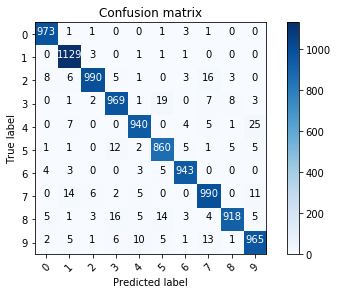

In [7]:
plot_confusion_matrix(cm,[i for i in range(10)])